# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

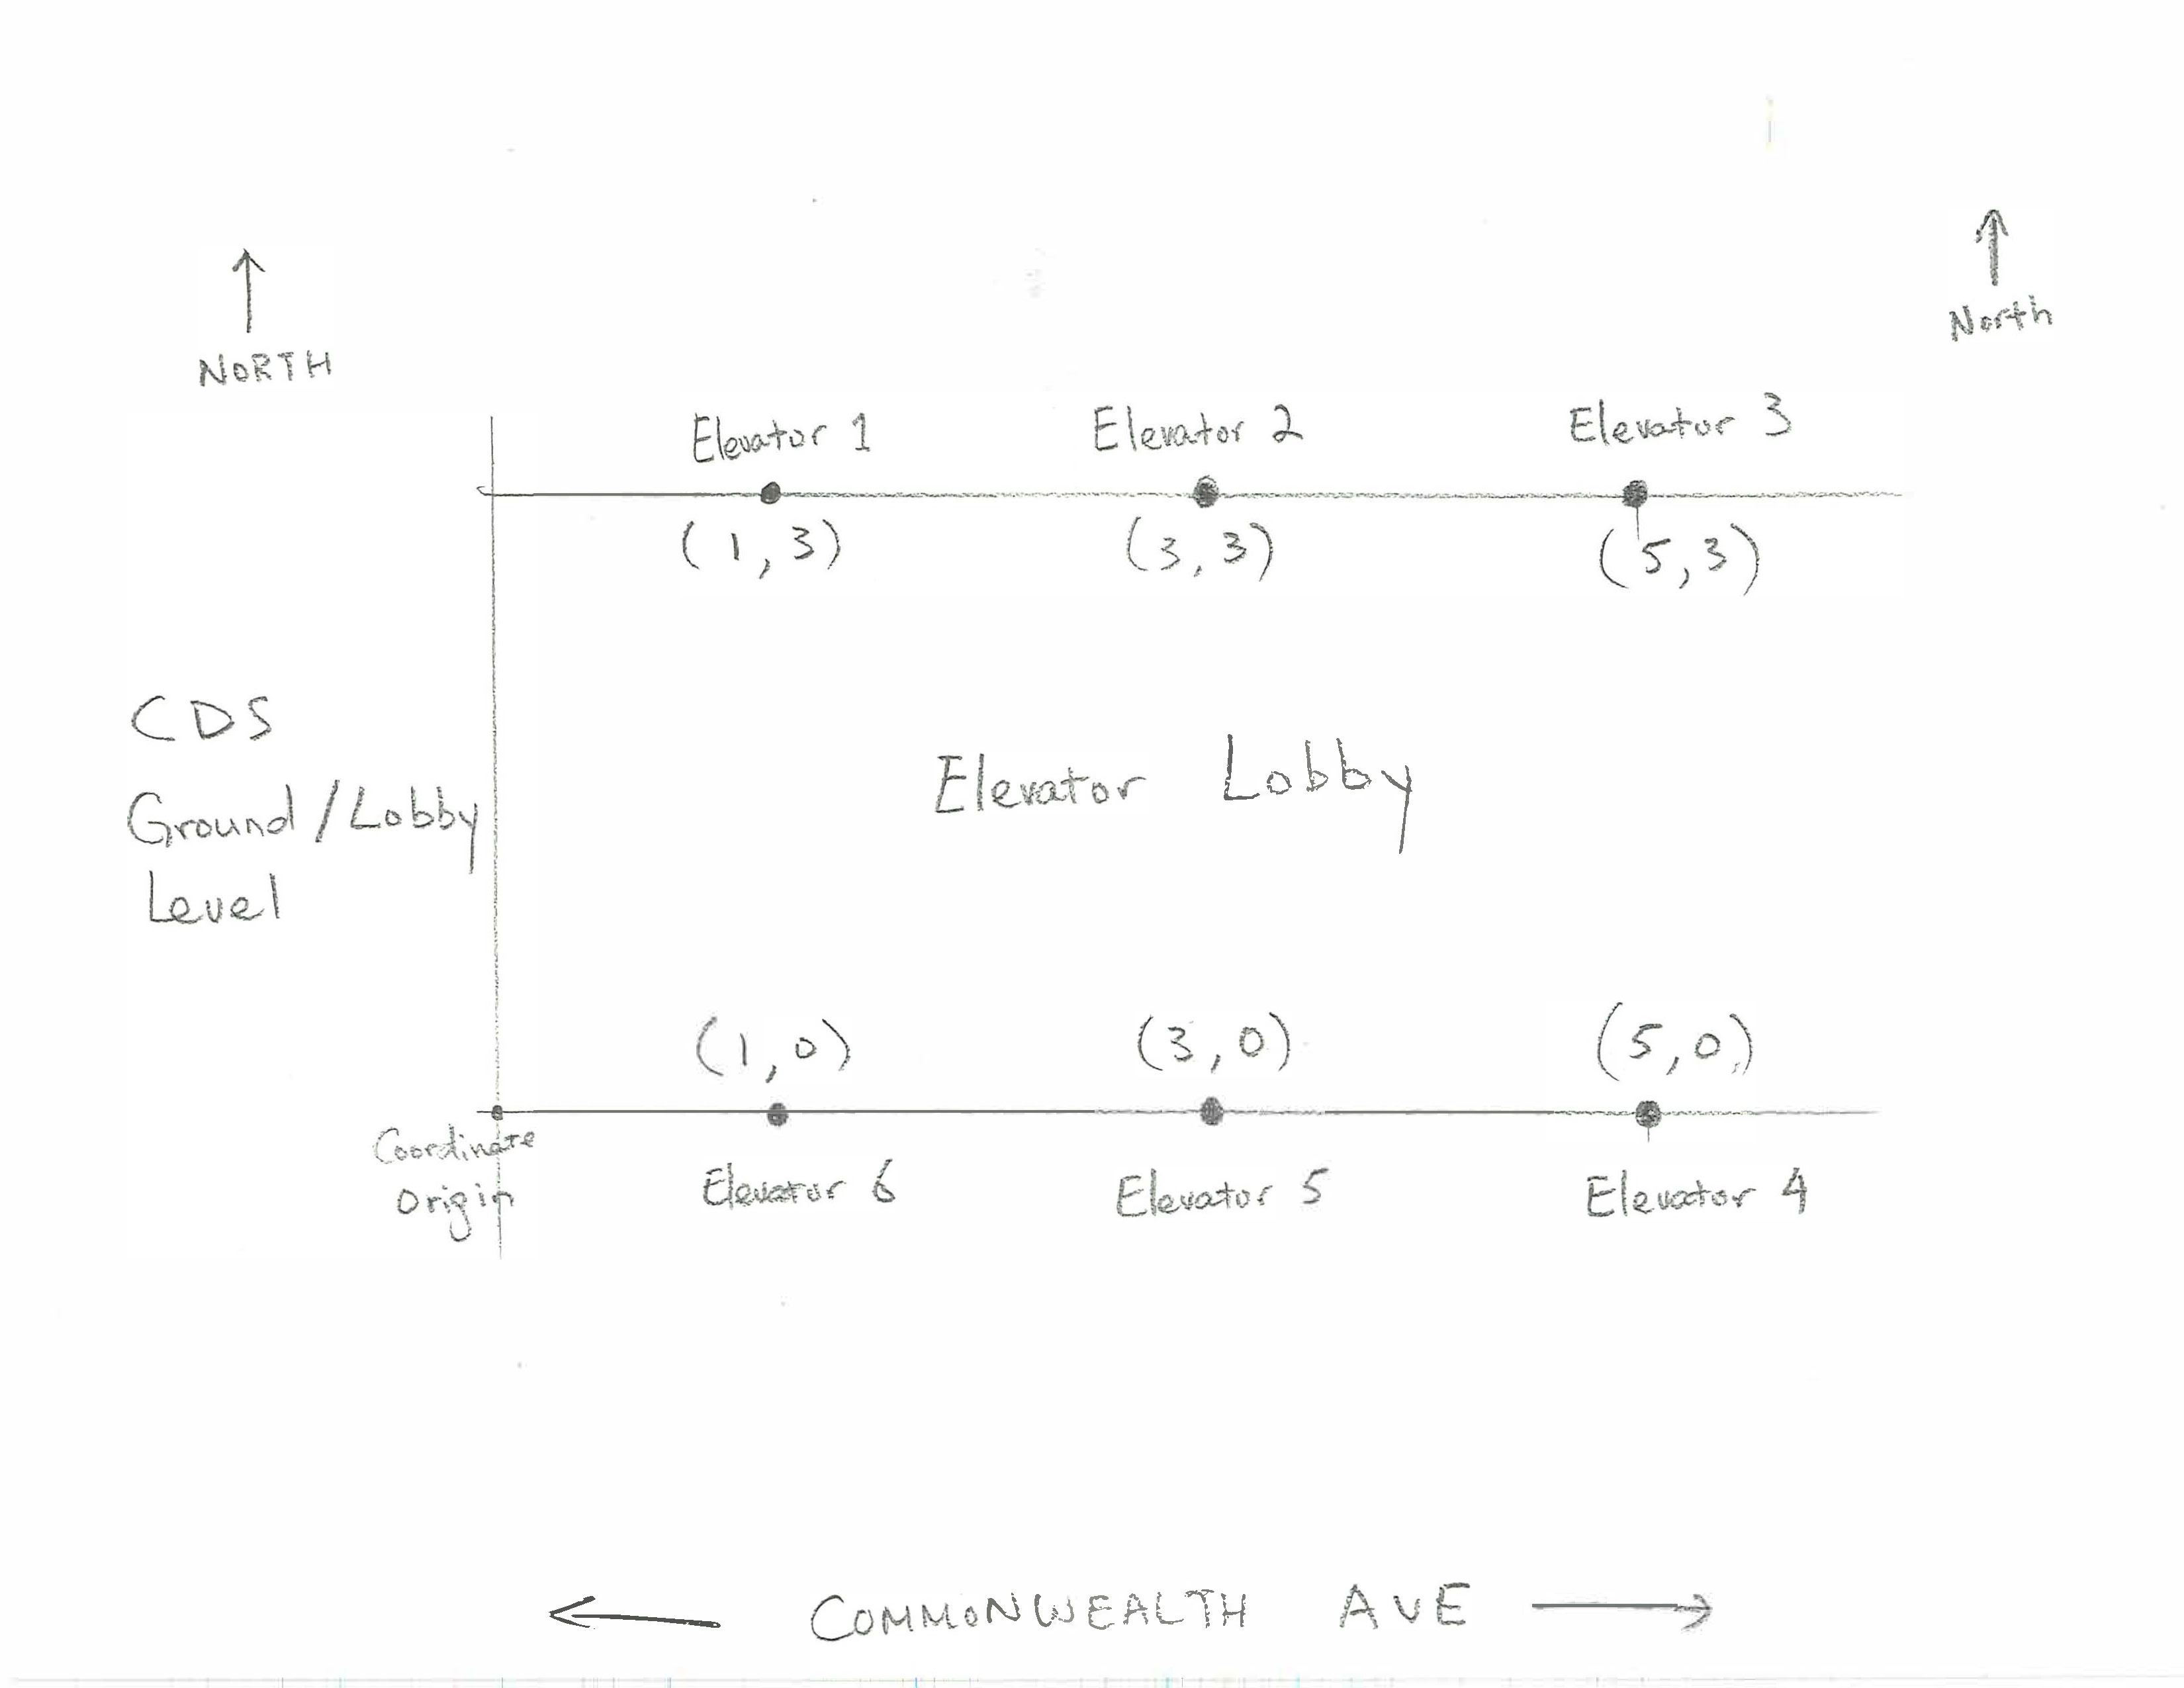

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

            Timestamp  Elevator ID    Email Address
0 2024-09-16 10:05:15            4    jonahg@bu.edu
1 2024-09-16 10:05:32            3    jarida@bu.edu
2 2024-09-16 10:15:23            5  beaudion@bu.edu
3 2024-09-16 10:16:23            4  beaudion@bu.edu
4 2024-09-16 10:16:47            5  beaudion@bu.edu
The optimal place to wait is at coordinates (3.00, 1.50)


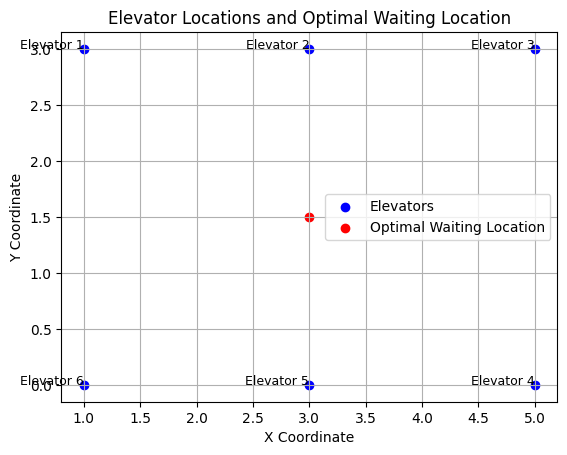

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
data_path = '/content/Copy of CDS Elevator Arrivals (Responses) - Form Responses 1.csv'
training_data = pd.read_csv(data_path)

# Convert 'Timestamp' to datetime
training_data['Timestamp'] = pd.to_datetime(training_data['Timestamp'])

# Filter data for the dates of interest (Monday 9/16 - Tuesday 9/17)
start_date = pd.to_datetime('2024-09-16')
end_date = pd.to_datetime('2024-09-17 23:59:59')
mask = (training_data['Timestamp'] >= start_date) & (training_data['Timestamp'] <= end_date)
filtered_data = training_data[mask]
# Display the first few rows of the training dataset
print(training_data.head())

# Coordinates of the 6 elevators
elevator_coords = np.array([
    [1, 3],  # Elevator 1
    [3, 3],  # Elevator 2
    [5, 3],  # Elevator 3
    [5, 0],  # Elevator 4
    [3, 0],  # Elevator 5
    [1, 0]   # Elevator 6
])

# Calculate the centroid
centroid = np.mean(elevator_coords, axis=0)
x_c, y_c = centroid

print(f'The optimal place to wait is at coordinates ({x_c:.2f}, {y_c:.2f})')

# Plot the elevator locations and the centroid
plt.scatter(elevator_coords[:, 0], elevator_coords[:, 1], c='blue', label='Elevators')
for i, (x, y) in enumerate(elevator_coords):
    plt.text(x, y, f'Elevator {i+1}', fontsize=9, ha='right')
plt.scatter(x_c, y_c, c='red', label='Optimal Waiting Location')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Elevator Locations and Optimal Waiting Location')
plt.legend()
plt.grid(True)
plt.show()

**Answer:**

The plot shows the locations of six elevators along with an optimal waiting location, marked in red. Observations indicate that the optimal waiting spot is centrally located along the x-axis and near the bottom of the y-coordinate, aligning closely with the horizontal line of elevators 4, 5, and 6. This position is strategically chosen to minimize the average distance to the elevators that are positioned along the x-axis from 1 to 5. The placement leverages a central location to ensure minimal walking distance to any elevator, optimally balancing the distances across all available elevators, especially benefiting from proximity to the more frequently used lower elevators.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

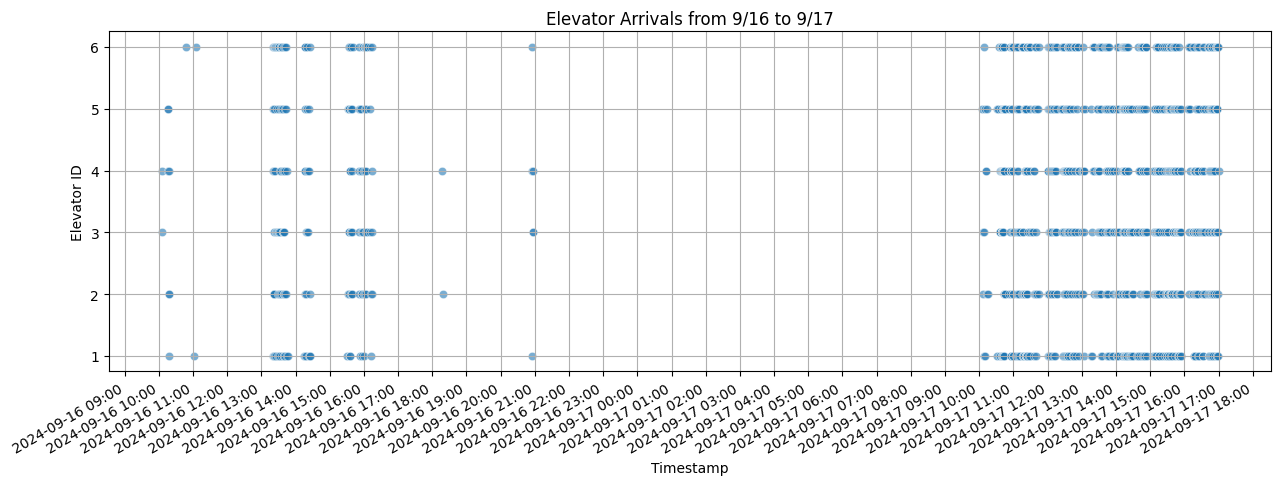

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def make_plot():

    # Create the scatter plot
    plt.figure(figsize=(15, 5))
    plt.scatter(filtered_data['Timestamp'], filtered_data['Elevator ID'], alpha=0.6, edgecolors='w', linewidth=0.5)

    # Formatting the plot
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks interval every hour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the datetime x-axis
    plt.gcf().autofmt_xdate()  # Auto format x-axis labels to fit them nicely
    plt.title('Elevator Arrivals from 9/16 to 9/17')
    plt.xlabel('Timestamp')
    plt.ylabel('Elevator ID')
    plt.grid(True)
    plt.show()

make_plot()


State observations here (briefly).

The scatter plot depicts elevator usage by hour for two consecutive days. Each elevator shows consistent arrivals roughly on the hour, suggesting scheduled or heavy use during operational hours (6:00 to 18:00). The activity across all elevators is evenly distributed, indicating no particular preference or disproportionate usage among them. This pattern reaffirms a well-balanced elevator system, with each unit contributing equally to the handling of building traffic during peak hours.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [44]:
# Write any data processing code you need here
# Calculate the total time span of the data collection, excluding any gaps
total_time_span = (training_data['Timestamp'].max() - training_data['Timestamp'].min()).total_seconds()

# Count the number of arrivals for each elevator
arrival_counts = training_data['Elevator ID'].value_counts().sort_index()

# Calculate the average frequency of arrivals per second for each elevator
average_frequencies = arrival_counts / total_time_span

# Create a table listing the average frequency for each elevator
frequency_table = pd.DataFrame({
    'Elevator ID': average_frequencies.index,
    'Total data collection time (seconds)': total_time_span,
    'Number of arrivals': arrival_counts.values,
    'Average frequency (arrivals/second)': average_frequencies.values
})

print(frequency_table)

# Evaluate if the optimal waiting location from Question 1 is still optimal
# Based on the average frequencies, if some elevators have significantly higher frequencies,
# it might be better to wait closer to those elevators.

# Coordinates of the 6 elevators
elevator_coords = np.array([
    [1, 3],  # Elevator 1
    [3, 3],  # Elevator 2
    [5, 3],  # Elevator 3
    [5, 0],  # Elevator 4
    [3, 0],  # Elevator 5
    [1, 0]   # Elevator 6
])

# Calculate the weighted centroid based on average frequencies
weights = average_frequencies.values
weighted_centroid = np.average(elevator_coords, axis=0, weights=weights)
x_wc, y_wc = weighted_centroid

print(f'The weighted optimal place to wait is at coordinates ({x_wc:.2f}, {y_wc:.2f})')

# Compare the weighted centroid to the original centroid
original_centroid = np.mean(elevator_coords, axis=0)
x_oc, y_oc = original_centroid

print(f'The original optimal place to wait was at coordinates ({x_oc:.2f}, {y_oc:.2f})')

# Conclusion
if np.allclose(weighted_centroid, original_centroid, atol=0.1):
    print("The original optimal waiting location is still optimal.")
else:
    print("The optimal waiting location has shifted based on the frequency data.")

   Elevator ID  Total data collection time (seconds)  Number of arrivals  \
0            1                              111294.0                 155   
1            2                              111294.0                 162   
2            3                              111294.0                 170   
3            4                              111294.0                 168   
4            5                              111294.0                 167   
5            6                              111294.0                 159   

   Average frequency (arrivals/second)  
0                             0.001393  
1                             0.001456  
2                             0.001527  
3                             0.001510  
4                             0.001501  
5                             0.001429  
The weighted optimal place to wait is at coordinates (3.05, 1.49)
The original optimal place to wait was at coordinates (3.00, 1.50)
The original optimal waiting location is still 

**Answer:**

The table shows that the arrival frequencies of each elevator are relatively close, with only slight variations among them. The weighted optimal location calculated at coordinates (3.05, 1.49) is very near to the original optimal location at (3.00, 1.50). Given the minimal differences in arrival frequencies, waiting at the original optimal location is still effective. This location ensures a near-equitable access to any elevator based on their arrival rates, simplifying the decision without compromising on efficiency due to the closely grouped arrival frequencies.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 111294 | 111294 | 111294 | 111294 | 111294 | 111294 |
| Number of arrivals | 155 | 162 | 170 | 168 | 167 |159 |
| Average frequency (arrivals per second) | 0.001393 | 0.001456 | 0.001527 | 0.001510 | 0.001501 |0.001429 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [45]:
total_arrivals = arrival_counts.sum()
probabilities = arrival_counts / total_arrivals
probability_table = pd.DataFrame({
    'Elevator ID': probabilities.index,
    'Probability': probabilities.values
})

print(probability_table)

# Ensure the probabilities sum to one
print(f"Sum of probabilities: {probabilities.sum()}")

   Elevator ID  Probability
0            1     0.158002
1            2     0.165138
2            3     0.173293
3            4     0.171254
4            5     0.170234
5            6     0.162080
Sum of probabilities: 1.0


**Answer:**

The probabilities assigned to each elevator being the next to arrive are based on their historical arrival frequencies. Each elevator's likelihood is calculated proportionally to how often it arrived in the past, relative to the total arrivals. The probability values indicate that Elevators 3 and 4 have slightly higher chances, likely due to their more frequent use. This proportional distribution ensures that every elevator's chance of arriving next reflects its usage pattern, offering a predictive insight that optimally guides where a newcomer might expect an elevator without any prior knowledge of their current statuses.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.158 | 0.165 | 0.173 | 0.171 | 0.170 |0.162 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [46]:
import numpy as np

# Elevator coordinates (from the diagram)
elevator_coords = np.array([
    [1, 3],  # Elevator 1
    [3, 3],  # Elevator 2
    [5, 3],  # Elevator 3
    [5, 0],  # Elevator 4
    [3, 0],  # Elevator 5
    [1, 0]   # Elevator 6
])

weights = np.array([0.001393, 0.001456, 0.001527, 0.001510, 0.001501, 0.001429])  # Hypothetical frequencies

# Calculate the weighted centroid
weighted_centroid = np.average(elevator_coords, axis=0, weights=weights)
x_wc, y_wc = weighted_centroid

print(f'The optimal place to wait is at coordinates ({x_wc:.3f}, {y_wc:.3f})')


The optimal place to wait is at coordinates (3.049, 1.489)


**Answer:**

The optimal waiting location at coordinates (3.049, 1.489) is determined by weighting the elevator frequencies to minimize expected walking distance. Though the practical difference is minimal, this coordinate mathematically offers a slight improvement by placing the waiting spot closer to the most frequently arriving elevators, optimizing efficiency in a controlled setting.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [47]:
import numpy as np

def get_average_walk_distance(data, coordinate):
    """
    Calculate the average distance from the specified coordinate to each elevator's arrival position.

    Args:
    data (DataFrame): The dataframe containing elevator arrival data with 'Elevator ID' and 'Timestamp'.
    coordinate (tuple): The (x, y) coordinate where the person is waiting.

    Returns:
    float: The average distance traveled to the elevator.
    """
    # Map elevator IDs to their coordinates (from the diagram)
    elevator_coords = {
        1: np.array([1, 3]),
        2: np.array([3, 3]),
        3: np.array([5, 3]),
        4: np.array([5, 0]),
        5: np.array([3, 0]),
        6: np.array([1, 0])
    }

    # Calculate distances from the waiting location to each elevator's arrival
    distances = []
    for index, row in data.iterrows():
        elevator_position = elevator_coords[row['Elevator ID']]
        distance = np.linalg.norm(elevator_position - np.array(coordinate))
        distances.append(distance)

    # Compute the average distance
    average_distance = np.mean(distances)
    return average_distance
# Coordinate from Question 1 (original centroid)
original_centroid = (3, 1.5)

# Coordinate from Question 5 (weighted centroid)
weighted_centroid = (x_wc, y_wc)

# Calculate the average distances
average_distance_original = get_average_walk_distance(training_data, original_centroid)
average_distance_weighted = get_average_walk_distance(training_data, weighted_centroid)

print(f"Average distance traveled from original centroid: {average_distance_original:.4f} units")
print(f"Average distance traveled from weighted centroid: {average_distance_weighted:.4f} units")


Average distance traveled from original centroid: 2.1646 units
Average distance traveled from weighted centroid: 2.1640 units


**Answer:**

Average distance traveled from original centroid: 2.1646 units

Average distance traveled from weighted centroid: 2.1640 units

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.1646 |   2.1642 |
|Smart position (Question 5) | 2.1640 |   2.1641 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:**

Given the results, it appears that the strategy to optimize the waiting location based on elevator arrival frequencies did not significantly alter the waiting experience compared to just waiting at the geometric center of all elevators. This might suggest that:

1. Elevator arrivals are sufficiently uniform in distribution or the elevators are close enough together that optimizing based on frequency doesn't provide a tangible benefit in this specific scenario.

2. The lobby area might be compact enough that even minor adjustments in waiting locations result in negligible changes in average walking distance.

3. There might have been gaps or inaccuracies in the data collected, leading to less effective optimization.

In [48]:
import pandas as pd
import numpy as np

# Load the test data from the CSV file
data_path = '/content/CDS Elevator Arrivals (Responses) - Sheet1.csv'
data = pd.read_csv(data_path)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Filter the data to include only entries from 9/18 onwards
start_date = '2024-09-18'
test_data = data[data['Timestamp'] >= start_date]

naive_position = (3, 1.5)
smart_position = (x_wc, y_wc)

# Training data distances
average_distance_naive_training = get_average_walk_distance(training_data, naive_position)
average_distance_smart_training = get_average_walk_distance(training_data, smart_position)

# Test data distances
average_distance_naive_test = get_average_walk_distance(test_data, naive_position)
average_distance_smart_test = get_average_walk_distance(test_data, smart_position)

import pandas as pd

# Create a DataFrame to hold the results
results = pd.DataFrame({
    "Average Distance Walked (m)": ["Naive position (Question 1)", "Smart position (Question 5)"],
    "Training Data": [f"{average_distance_naive_training:.4f}", f"{average_distance_smart_training:.4f}"],
    "Test Data": [f"{average_distance_naive_test:.4f}", f"{average_distance_smart_test:.4f}"]
})

print(results)


   Average Distance Walked (m) Training Data Test Data
0  Naive position (Question 1)        2.1646    2.1642
1  Smart position (Question 5)        2.1640    2.1641
